In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
import statsmodels.api as sm


## Regresion simple

In [3]:
dataset = pd.read_csv('salarios.txt')
dataset

,years,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
x = dataset.iloc[:, :1].values
y = dataset.iloc[:, 1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
#dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
#Cargamos el conjunto de entrenamiento al modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
#Predicción de los resultados del conjunto de pruebas (x_test)
ypred_test = lr.predict(x_test)


ECM (Error Cuadrático Medio) es la media de los errores al cuadrado entre los valores observados y los valores predichos por el modelo.

EAM (Error Absoluto Medio) es la media de las diferencias absolutas entre los valores observados y los valores predichos

In [25]:
ecm = mean_squared_error(y_test, ypred_test)
eam = mean_absolute_error(y_test, ypred_test)
print('EAM', eam)
print('ECM', ecm)

EAM 3737.417861878896
ECM 23370078.800832972


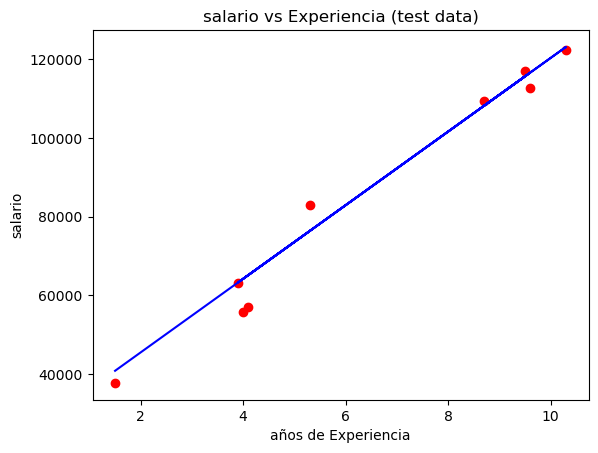

In [26]:
#Ahora comparamos y_pred con los valores reales y_test
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, ypred_test, color = 'blue')
plt.title('salario vs Experiencia (test data)')
plt.xlabel('años de Experiencia')
plt.ylabel('salario')
plt.show()

In [27]:
b1=lr.coef_
b0=lr.intercept_
print('intercept',b0,'coef',b1)


intercept 26777.391341197625 coef [9360.26128619]


In [39]:
mean_residuos=np.mean(residuos_train)
mean_residuos

7.622431786287399e-12

Text(0.5, 0, 'y_train')

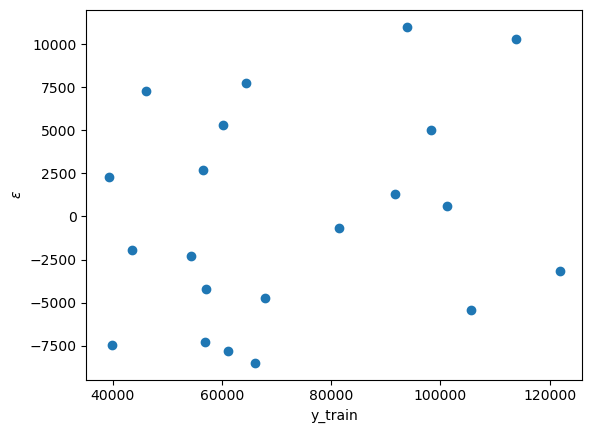

In [43]:
ypred_train = lr.predict(x_train)
residuos_train = y_train - ypred_train
plt.scatter(y_train,residuos_train)
plt.ylabel(r'$\epsilon$')
plt.xlabel('y_train')

<AxesSubplot:ylabel='Count'>

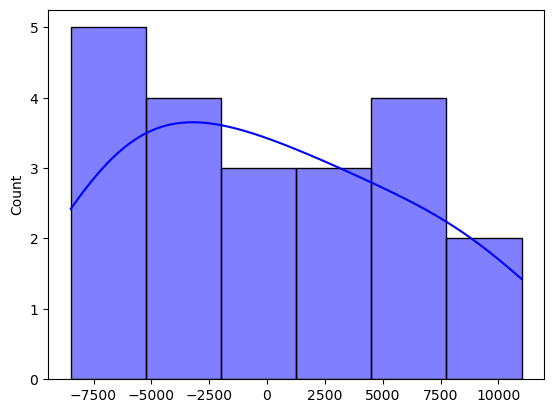

In [55]:
sns.histplot(residuos_train, kde=True, color='blue') 

QQ plot (Quantile-Quantile plot) permite comparar los cuantiles observados de datos con los cuantiles esperados de una distribución, como la distribución normal.  
Si los puntos del QQ plot están cerca de la línea diagonal, significa que los datos están muy cerca de seguir una distribución normal. Si los puntos se alejan hacia arriba o hacia abajo de la línea en las colas, puede indicar que hay valores extremos o una cola pesada en los datos. 
Si el QQ plot muestra una curvatura o una forma en S, es otra indicación de que los datos pueden no ser normales. Esto podría sugerir que los datos tienen una distribución diferente a la normal.

Nota que la interpretación de un QQ plot es subjetiva, y no proporciona una prueba definitiva de normalidad.

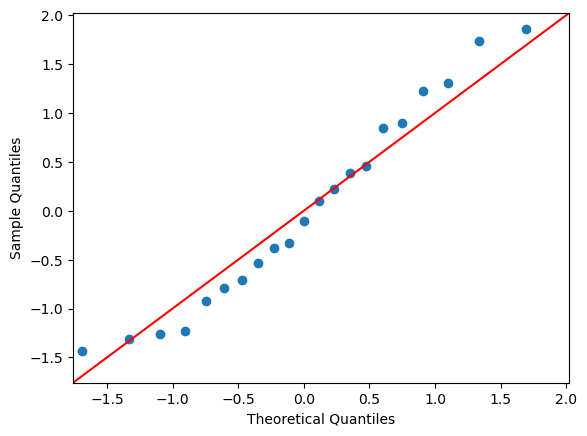

In [33]:
sm.qqplot(residuos_train, line='45', fit=True)
plt.show()

## Regresion multiple

In [2]:
#data = pd.read_csv('blood_pressure.txt')
#diabetes UCI
# diabetes = datasets.load_diabetes()
# data_mlt= pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# data_mlt
# number_examples=200
# x = diabetes.data[:number_examples]
# y = diabetes.target[:number_examples]
# x
#y

# housing = fetch_california_housing()
# data_mtl = pd.DataFrame(housing.data, columns=housing.feature_names)
# data_mtl.head()

data_mlt = pd.read_csv('bodyfat.csv')
data=data_mlt

data


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
# sns.pairplot(data_mlt)
# plt.show()

In [34]:
x = data_mlt.iloc[:, 3:].values
y = data_mlt.iloc[:, 1].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
std_scaler = StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.transform(x_test)

In [37]:
lr = LinearRegression()
lr.fit(x_train, y_train)
# predecir sobre conjunto de prueba
y_pred = lr.predict(x_test)

Calcula R-cuadrado (coeficiente de determinación) para el modelo de regresión lineal: Mide qué tan bien se ajusta el modelo a los datos de entrenamiento.  Valores más cercanos a 1 para R-cuadrado indica un mejor ajuste.


In [38]:
train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)
print('train_score',train_score,'test_score',test_score)

train_score 0.7423277590099493 test_score 0.7424534538392058


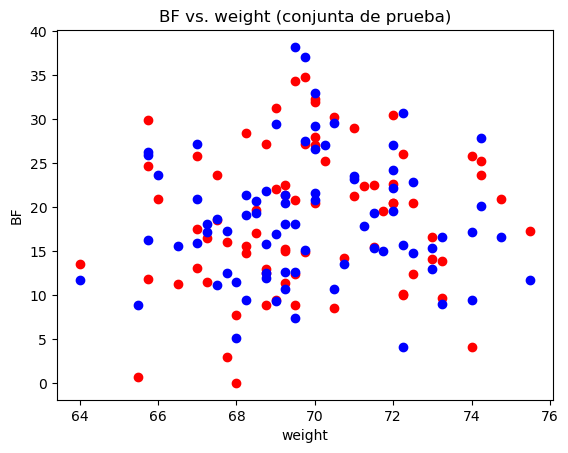

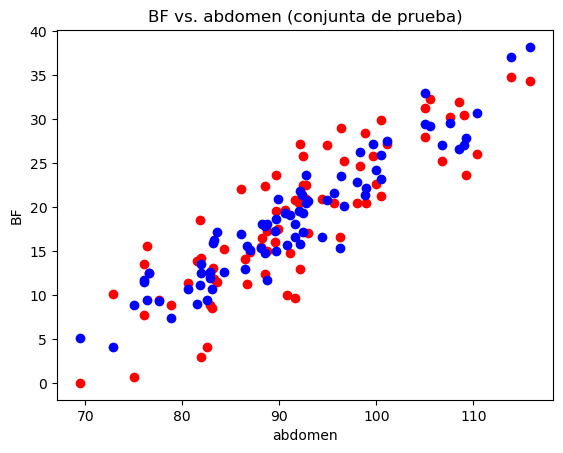

In [25]:
plt.scatter(x_test[:,1], y_test, color = 'red')
plt.scatter(x_test[:,1], y_pred, color = 'blue')
plt.title('BF vs. weight (conjunta de prueba)')
plt.xlabel('weight')
plt.ylabel('BF')
plt.show()
###
###
plt.scatter(x_test[:,4], y_test, color = 'red')
plt.scatter(x_test[:,4], y_pred, color = 'blue')
plt.title('BF vs. abdomen (conjunta de prueba)')
plt.xlabel('abdomen')
plt.ylabel('BF')
plt.show()
###


Text(0, 0.5, 'y')

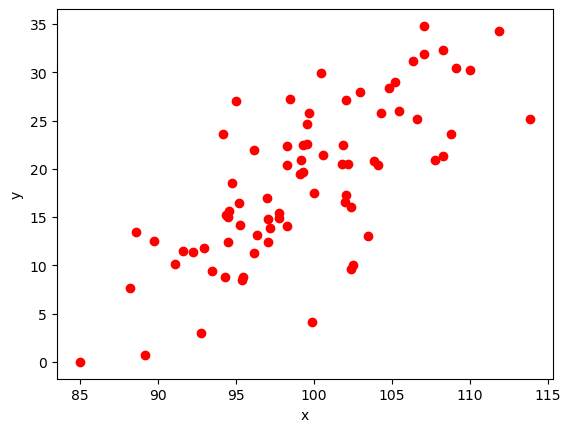

In [22]:
plt.scatter(x_test[:,5], y_test, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0, 'y_train')

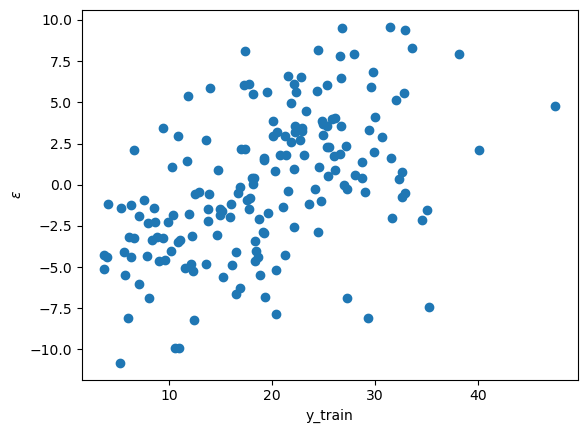

In [26]:
ypred_train = lr.predict(x_train)
residuos_train = y_train - ypred_train
plt.scatter(y_train,residuos_train)
plt.ylabel(r'$\epsilon$')
plt.xlabel('y_train')

Text(0.5, 0, '$\\epsilon$')

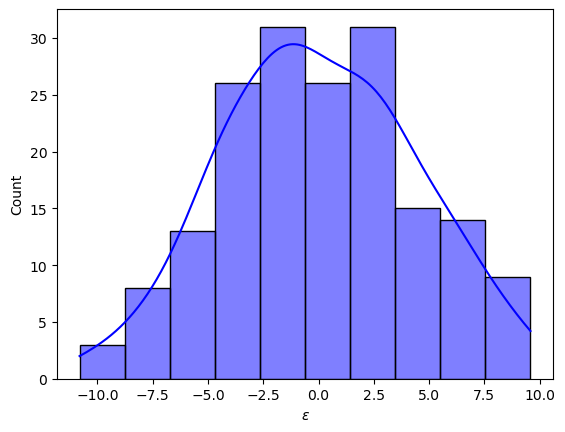

In [31]:
sns.histplot(residuos_train, kde=True, color='blue') 
plt.xlabel(r'$\epsilon$')


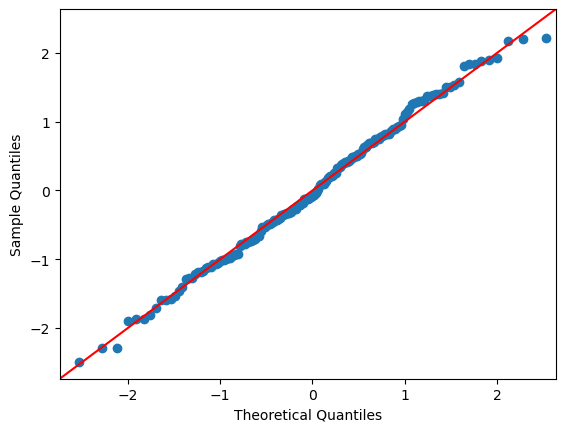

In [27]:
sm.qqplot(residuos_train, line='45', fit=True)
plt.show()

## Coeficientes y el intercepto

In [10]:
lr = LinearRegression()
lr_reg=lr.fit(x_train, y_train)
#coefficient of determination 
r2=lr_reg.score(x_train, y_train)
print('R2',r2)
# Obtener parameteros beta de regresion 
print('coefficients', lr_reg.coef_)
# predecir sobre conjunto de prueba
print('intercept:', lr_reg.intercept_)


R2 0.7423277590099493
coefficients [-0.08743331 -0.12998111 -0.42923686 -0.01908798  1.05107049 -0.3190391
  0.17161253 -0.0242471   0.05157266  0.22048028  0.41825205 -1.50305649]
intercept: -5.427431041245665


(15.5, -0.5)

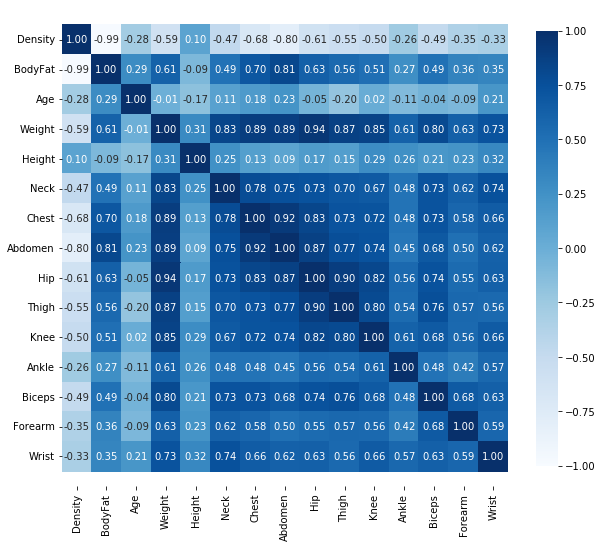

In [4]:
data_cor=data_mlt.corr()
plt.figure(figsize=(10,10))
ax=sns.heatmap(data_cor,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f',center=0, cmap ='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Variation inflation factor

In [28]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor 
n=12#len(data_blood.columns[0:-1])
for i in range(0,12):
    print('VIF',variance_inflation_factor(x, i))

### Crear un dataframe
pd.DataFrame({'variables':data.columns[3:], 'VIF':[variance_inflation_factor(x, i) for i in range(12)]})


VIF 211.22654495560184
VIF 389.76494179897975
VIF 962.9752942749445
VIF 1116.1222094056602
VIF 702.6767507241007
VIF 1814.1751365900973
VIF 864.5620298937504
VIF 1056.5361695142385
VIF 341.8821567656311
VIF 414.3686710558253
VIF 429.73762587121985
VIF 1110.8479684967083


,variables,VIF
0,Weight,211.226545
1,Height,389.764942
2,Neck,962.975294
3,Chest,1116.122209
4,Abdomen,702.676751
5,Hip,1814.175137
6,Thigh,864.562030
7,Knee,1056.536170
8,Ankle,341.882157
9,Biceps,414.368671


In [27]:
data.columns[3:]

Index(['Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee',
       'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

## Metrics

In [106]:
from sklearn import metrics
import statsmodels.api as sm

In [30]:
x_stat=sm.add_constant(x_train)
model=sm.OLS( y_train, x_stat)
results=model.fit()
print('results.summary',results.summary())
print('results.params',results.params)

results.summary                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     39.13
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.30e-42
Time:                        20:36:30   Log-Likelihood:                -507.31
No. Observations:                 176   AIC:                             1041.
Df Residuals:                     163   BIC:                             1082.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4274     20.863    

## Ridge, Lasso and ElasticNet  regression


In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [13]:
#from sklearn.preprocessing import StandardScaler
#Dado que estos métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, 
#todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores 
#antes de entrenar el modelo.
# scaler = StandardScaler()
# x_blood_train_std = scaler.fit_transform(x_blood_train)
# x_blood_test_std = scaler.transform(x_blood_test)

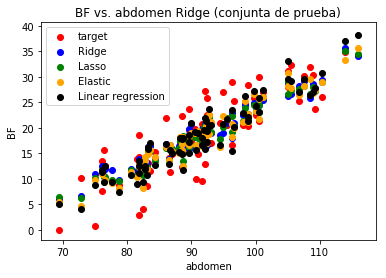

In [32]:


ridgereg = Ridge( alpha=0.1,normalize=True)
ridgereg.fit(x_train,y_train)
y_pred_ridge = ridgereg.predict(x_test)

## Lasso
lasso = Lasso(alpha = 0.02,normalize=True)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

## Elastic Net 
# la funcion de penalizacion es alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
# Por defecto alpha=1.0, *, l1_ratio=0.5
# normalize for ElasticNet seems to be deprecated 
elastic=ElasticNet(alpha=1, l1_ratio=0.5, random_state=0)
elastic.fit(x_train,y_train)
y_pred_elastic = elastic.predict(x_test)

plt.scatter(x_test[:,4], y_test, color = 'red',label='target')
plt.scatter(x_test[:,4], y_pred_ridge, color = 'blue',label='Ridge')
plt.scatter(x_test[:,4], y_pred_lasso, color = 'green',label='Lasso')
plt.scatter(x_test[:,4], y_pred_elastic, color = 'orange',label='Elastic')


plt.scatter(x_test[:,4], y_pred, color = 'black',label='Linear regression')

plt.title('BF vs. abdomen Ridge (conjunta de prueba)')
plt.xlabel('abdomen')
plt.ylabel('BF')
plt.legend()
plt.show()

In [44]:
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)
print('train_score_ls',train_score_ls,'test_score_ls',test_score_ls)


train_score_rg =ridgereg.score(x_train,y_train)
test_score_rg =ridgereg.score(x_test,y_test)
print('train_score_rg',train_score_rg,'test_score_rg',test_score_rg)

train_score_lr=lr_reg.score(x_train, y_train)
test_score_lr=lr_reg.score(x_test, y_test)
print('train_score_lr',train_score_lr,'test_score_lr',test_score_lr)


train_score_ls 0.7097917319351847 test_score_ls 0.740232681686412
train_score_rg 0.6971202361100854 test_score_rg 0.723754151359804
train_score_lr 0.7423277590099493 test_score_lr 0.742453453839208


In [35]:
alps = 10**np.linspace(-2,2,50)
alps

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

## Cross validation for $\alpha$

In [40]:
from sklearn.linear_model import LassoCV, ElasticNetCV

lasso_cv = LassoCV(alphas = alps,normalize=True, random_state=0).fit(x_train, y_train)
print('lasso_coef',lasso_cv.coef_)

lasso_cv.score(x_train, y_train)
lasso_cv.score(x_test, y_test)

print('lasso_coef',lasso_cv.alpha_)

# Searches alphas with a fixed l1_ratio which by default is set to 0.5
elastic_cv = ElasticNetCV(alphas=alps, l1_ratio=0.5, cv=10).fit(x_train,y_train)
print('elastic_coef',elastic_cv.alpha_)

lasso_coef [-0.03422364 -0.17668642 -0.24836968  0.          0.88304909 -0.16905365
  0.         -0.         -0.          0.04153694  0.25436201 -1.42267686]
lasso_coef 0.01
elastic_coef 2.329951810515372


In [51]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alps,normalize=True).fit(x_train, y_train)
print('ridge_coef',ridge_cv.coef_)

ridge_cv.score(x_train, y_train)
ridge_cv.score(x_test, y_test)


ridge_coef [-0.06961482 -0.1555854  -0.41713125  0.03054676  0.9548714  -0.26957252
  0.13579987 -0.01669442 -0.00644321  0.19780339  0.37626198 -1.48121572]


0.7444406492588427

## Robust regression

In [41]:
from sklearn.datasets import make_regression
def get_dataset():
    x, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, 
                       effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
    for i in range(10):
        factor = np.random.randint(2, 4)
        if np.random.random() > 0.5:
            x[i] += factor * x.std()
        else:
            x[i] -= factor * x.std()
    return x,y
x,y=get_dataset()
#dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)





In [42]:
model_lr = LinearRegression()
results_lr = model_lr.fit(x_train, y_train)
y_pred_lr=model_lr.predict(x)


from sklearn.linear_model import HuberRegressor
#epsilon contral el numero de observaciones que se considera como outliers. Menor epsilon mas robusto es el modelo 
#epsilon should be greater than 1.0, default=1.35
model_h = HuberRegressor(epsilon=2) 
results_h = model_h.fit(x_train, y_train)
y_pred_h=model_h.predict(x)

from sklearn.linear_model import RANSACRegressor
model_ran = RANSACRegressor()
results_ran= model_ran.fit(x_train, y_train)
y_pred_ran=model_ran.predict(x)

from sklearn.linear_model import TheilSenRegressor
model_t = TheilSenRegressor()
results_t= model_t.fit(x_train, y_train)
y_pred_t=model_t.predict(x)

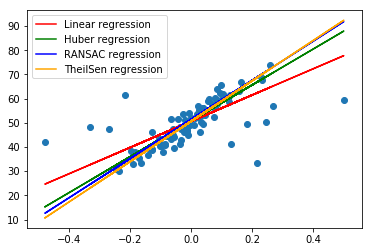

In [43]:
plt.figure()
plt.scatter(x,y)
plt.plot(x,y_pred_lr,color='red',label='Linear regression')
plt.plot(x,y_pred_h,color='green',label='Huber regression')
plt.plot(x,y_pred_ran,color='blue',label='RANSAC regression')
plt.plot(x,y_pred_t,color='orange',label='TheilSen regression')
plt.legend()
#plt.savefig (r'C:\HTD\figs\regression_robust.png')

In [56]:
lasso_cv=Lasso(alpha = 0.02,normalize=True, random_state=0).fit(x_train, y_train)
y_pred_lassocv=lasso_cv.predict(x)

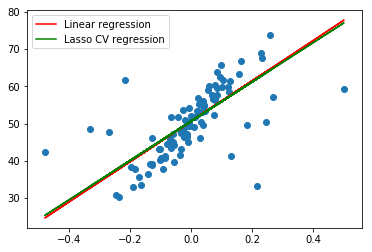

In [57]:
plt.figure()
plt.scatter(x,y)
plt.plot(x,y_pred_lr,color='red',label='Linear regression')
plt.plot(x,y_pred_lassocv,color='green',label='Lasso CV regression')
# plt.plot(x,y_pred_h,color='green',label='Huber regression')
# plt.plot(x,y_pred_ran,color='blue',label='RANSAC regression')
# plt.plot(x,y_pred_t,color='orange',label='TheilSen regression')
plt.legend()
#plt.savefig (r'C:\HTD\figs\regression_robust.png')

## Comparison

In [39]:
score_lr=model_lr.score(x_train, y_train)
score_h=model_h.score(x_train, y_train)
score_t=model_h.score(x_train, y_train)
score_ran=model_ran.score(x_train, y_train)
print('score_lr',score_lr,'score_t',score_t,'score_ran',score_ran,'score_h',score_h)

score_lr 0.5039024759331316 score_t 0.4467931252354367 score_ran 0.2698665416474534 score_h 0.4467931252354367
